<a href="https://colab.research.google.com/github/bhargavi5e1/bhargavi/blob/main/Titanic_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#                     Titanic Classification :
# Make a system which tells whether the person will be save from sinking. What factors were most likely lead to success-socio-economic status, age, gender and more.

In [4]:
import numpy as np
import pandas as pd

In [5]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
import warnings
warnings.simplefilter('ignore')

In [10]:
df= pd.read_csv('/content/train.csv')
df_test=pd.read_csv('/content/test.csv')

In [11]:
df.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   name      891 non-null    object 
 3   sex       891 non-null    object 
 4   age       714 non-null    float64
 5   sibsp     891 non-null    int64  
 6   parch     891 non-null    int64  
 7   ticket    891 non-null    object 
 8   fare      891 non-null    float64
 9   cabin     204 non-null    object 
 10  embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [13]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
df.isna().sum(),df_test.isna().sum()

(survived      0
 pclass        0
 name          0
 sex           0
 age         177
 sibsp         0
 parch         0
 ticket        0
 fare          0
 cabin       687
 embarked      2
 dtype: int64,
 PassengerId      0
 Pclass           0
 Name             0
 Sex              0
 Age             86
 SibSp            0
 Parch            0
 Ticket           0
 Fare             1
 Cabin          327
 Embarked         0
 dtype: int64)

In [15]:
df.columns,df_test.columns

(Index(['survived', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
        'fare', 'cabin', 'embarked'],
       dtype='object'),
 Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
        'Ticket', 'Fare', 'Cabin', 'Embarked'],
       dtype='object'))

**imputation techinique**           



<Axes: xlabel='age', ylabel='Density'>

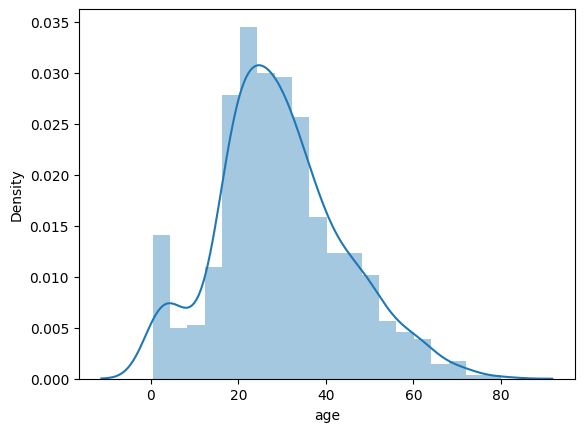

In [16]:
sns.distplot(df.age)

<Axes: xlabel='Age', ylabel='Density'>

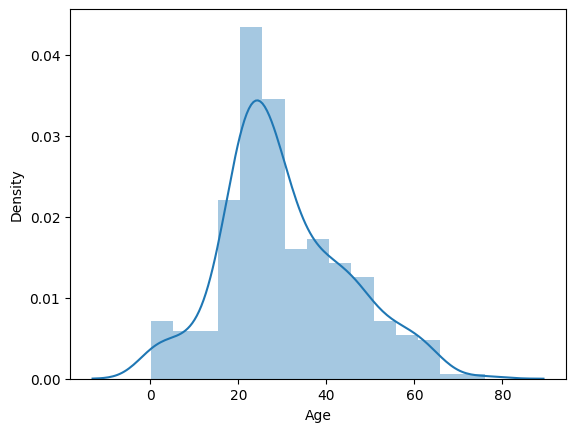

In [17]:
sns.distplot(df_test.Age)

In [18]:
df.age.isnull().sum()

177

In [19]:
df['age_mean']=df['age'].fillna(df['age'].mean())
df_test['Age_mean']=df_test['Age'].fillna(df['age'].mean())

In [20]:
df[['age_mean','age']]

,age_mean,age
0,22.000000,22.0
1,38.000000,38.0
2,26.000000,26.0
3,35.000000,35.0
4,35.000000,35.0
...,...,...
886,27.000000,27.0
887,19.000000,19.0
888,29.699118,NaN
889,26.000000,26.0


<Axes: xlabel='age_mean', ylabel='Density'>

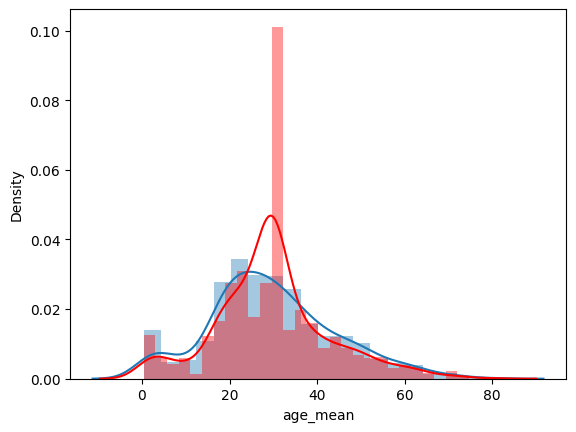

In [21]:
import seaborn as sns
sns.distplot(df['age'])
sns.distplot(df['age_mean'],color='r')

<Axes: xlabel='Age_mean', ylabel='Density'>

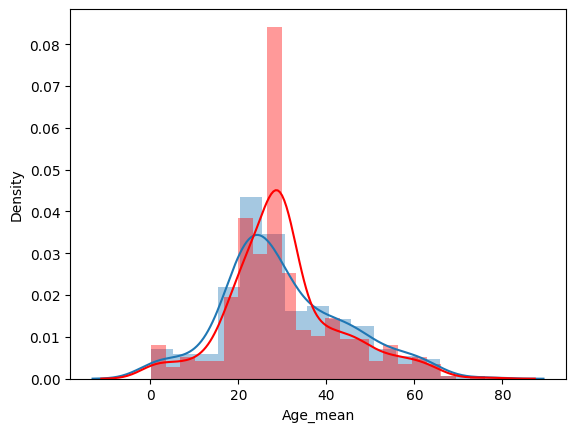

In [22]:
sns.distplot(df_test['Age'])
sns.distplot(df_test['Age_mean'],color='r')

**2. Median value imputation**

In [23]:
df.info()
df.drop('age',axis=1,inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   name      891 non-null    object 
 3   sex       891 non-null    object 
 4   age       714 non-null    float64
 5   sibsp     891 non-null    int64  
 6   parch     891 non-null    int64  
 7   ticket    891 non-null    object 
 8   fare      891 non-null    float64
 9   cabin     204 non-null    object 
 10  embarked  889 non-null    object 
 11  age_mean  891 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 83.7+ KB


In [24]:
df_test.info()
df_test.drop('Age',axis=1,inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  Age_mean     418 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 39.3+ KB


In [25]:
df.info(),df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   name      891 non-null    object 
 3   sex       891 non-null    object 
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   ticket    891 non-null    object 
 7   fare      891 non-null    float64
 8   cabin     204 non-null    object 
 9   embarked  889 non-null    object 
 10  age_mean  891 non-null    float64
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex  

(None, None)

**3. mode value imputation**

In [26]:
df[df['embarked'].isnull()]

,survived,pclass,name,sex,sibsp,parch,ticket,fare,cabin,embarked,age_mean
61,1,1,"Icard, Miss. Amelie",female,0,0,113572,80.0,B28,NaN,38.0
829,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,0,0,113572,80.0,B28,NaN,62.0


In [27]:
df['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [28]:
mode=df['embarked'].mode()[0]

mode

'S'

In [29]:
df['embarked_mode']=df['embarked'].fillna(mode)

In [30]:
df['embarked_mode'].isnull().sum()

0

In [31]:
df.drop(['embarked','ticket','name'],inplace=True,axis=1)

In [32]:
df.columns

Index(['survived', 'pclass', 'sex', 'sibsp', 'parch', 'fare', 'cabin',
       'age_mean', 'embarked_mode'],
      dtype='object')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   survived       891 non-null    int64  
 1   pclass         891 non-null    int64  
 2   sex            891 non-null    object 
 3   sibsp          891 non-null    int64  
 4   parch          891 non-null    int64  
 5   fare           891 non-null    float64
 6   cabin          204 non-null    object 
 7   age_mean       891 non-null    float64
 8   embarked_mode  891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [34]:
df.rename({'embarked_mode':'embarked','Age_mean':'Age'},inplace=True,axis=1)
df

,survived,pclass,sex,sibsp,parch,fare,cabin,age_mean,embarked
0,0,3,male,1,0,7.2500,NaN,22.000000,S
1,1,1,female,1,0,71.2833,C85,38.000000,C
2,1,3,female,0,0,7.9250,NaN,26.000000,S
3,1,1,female,1,0,53.1000,C123,35.000000,S
4,0,3,male,0,0,8.0500,NaN,35.000000,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,NaN,27.000000,S
887,1,1,female,0,0,30.0000,B42,19.000000,S
888,0,3,female,1,2,23.4500,NaN,29.699118,S
889,1,1,male,0,0,30.0000,C148,26.000000,C


In [65]:
df_test.rename({'Age_mean':'Age'},inplace=True,axis=1)

In [87]:
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['embarked'] = df['embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    int64  
 3   sibsp     891 non-null    int64  
 4   parch     891 non-null    int64  
 5   fare      891 non-null    float64
 6   cabin     204 non-null    object 
 7   age_mean  891 non-null    float64
 8   embarked  891 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 62.8+ KB


In [36]:
df['embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [39]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Ticket       418 non-null    object 
 7   Fare         417 non-null    float64
 8   Cabin        91 non-null     object 
 9   Embarked     418 non-null    object 
 10  Age          418 non-null    float64
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [64]:
df_test['Sex'] = df_test['Sex'].map({'male': 0, 'female': 1})
df_test['Embarked'] = df_test['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          0 non-null      float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Ticket       418 non-null    object 
 7   Fare         418 non-null    float64
 8   Cabin        91 non-null     object 
 9   Embarked     0 non-null      float64
 10  Age          418 non-null    float64
dtypes: float64(4), int64(4), object(3)
memory usage: 36.0+ KB


<Axes: xlabel='Fare', ylabel='Density'>

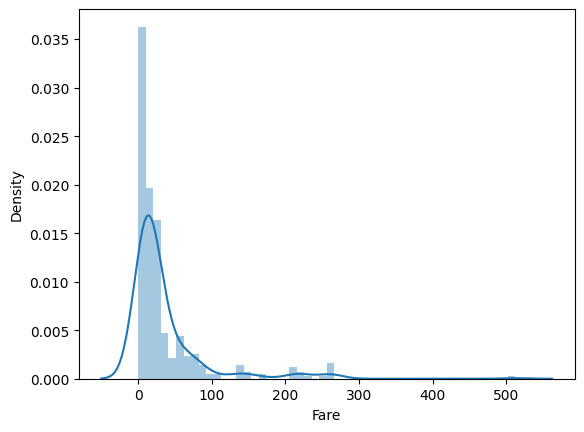

In [41]:
sns.distplot(df_test['Fare'])

In [42]:
import numpy as np
dfFare=np.log(df_test['Fare'])

In [43]:
FareMode=df_test['Fare'].median()

In [44]:
df['fare']=df['fare'].fillna(FareMode)
df_test['Fare']=df_test['Fare'].fillna(FareMode)

In [45]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int64  
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Ticket       418 non-null    object 
 7   Fare         418 non-null    float64
 8   Cabin        91 non-null     object 
 9   Embarked     418 non-null    int64  
 10  Age          418 non-null    float64
dtypes: float64(2), int64(6), object(3)
memory usage: 36.0+ KB


In [46]:
df.columns

Index(['survived', 'pclass', 'sex', 'sibsp', 'parch', 'fare', 'cabin',
       'age_mean', 'embarked'],
      dtype='object')

In [47]:
df_test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'Age'],
      dtype='object')

In [48]:
x=df[[ 'sex', 'age_mean', 'sibsp', 'parch', 'fare']]
y=df['survived']

<Axes: >

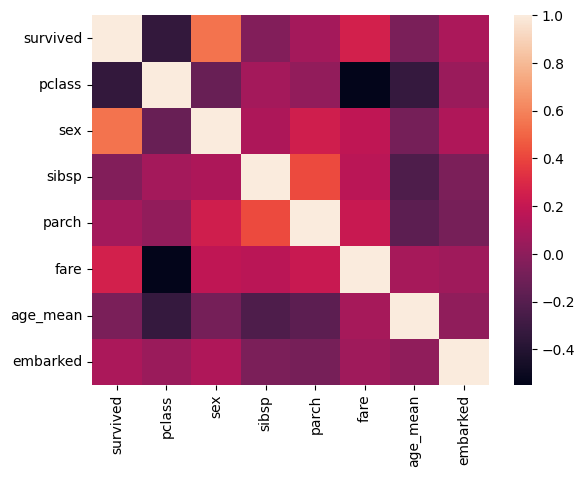

In [71]:
sns.heatmap(df.corr())

<Axes: xlabel='age_mean', ylabel='Count'>

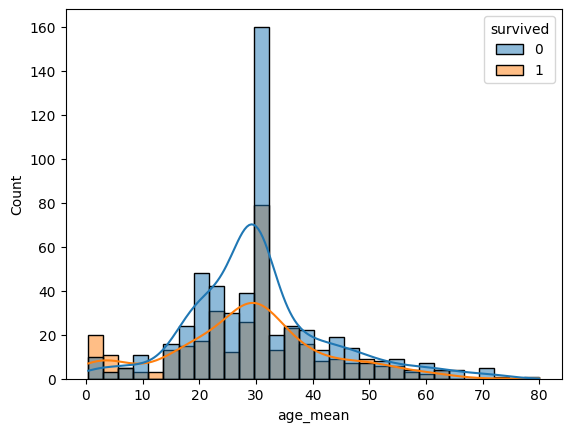

In [72]:
sns.histplot(data=df,x='age_mean',
#              y='survived',
             kde=True,hue='survived')

<Axes: xlabel='pclass', ylabel='Count'>

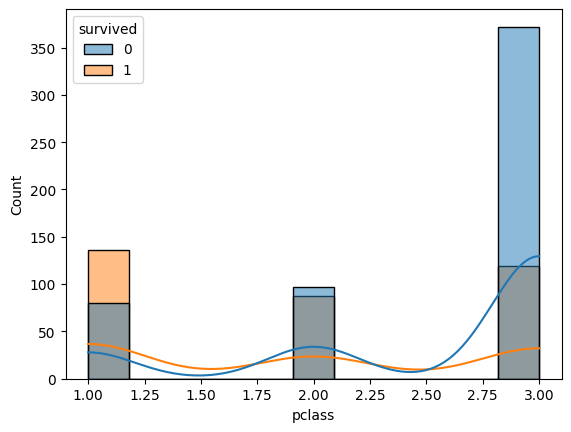

In [73]:
sns.histplot(data=df,x='pclass',
#              y='survived',
             kde=True,hue='survived')

<Axes: xlabel='fare', ylabel='Count'>

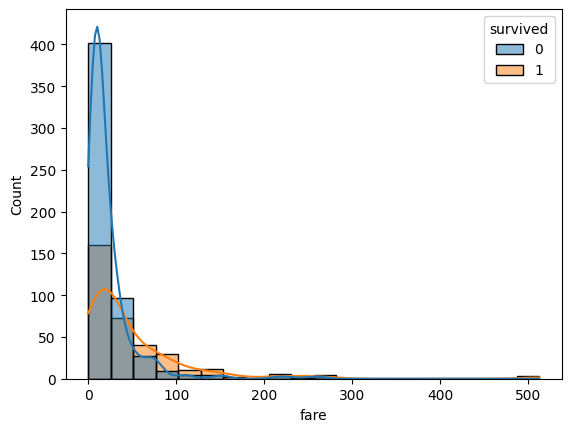

In [74]:
sns.histplot(data=df,x='fare',
#              y='survived',
             kde=True,hue='survived',bins =20)

<Axes: xlabel='sex', ylabel='Count'>

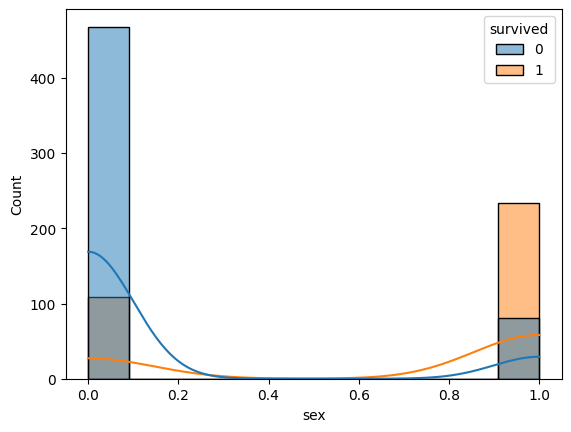

In [75]:
sns.histplot(data=df,x='sex',
             kde=True,hue='survived')

<Axes: xlabel='embarked', ylabel='survived'>

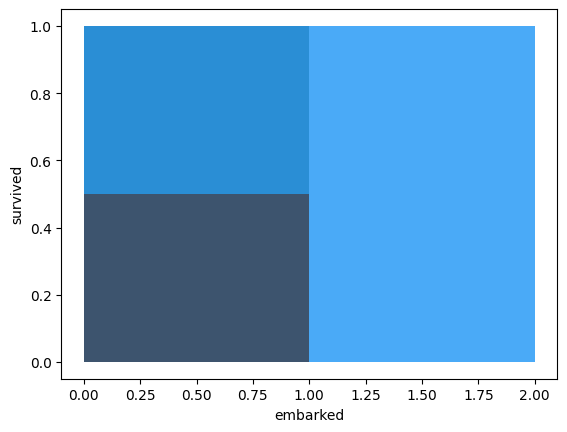

In [76]:
sns.histplot(data=df,x='embarked',
             y='survived',
             kde=True,bins=2)

**We can see that fare, Sex is highly corelated to survived column irrespective of their Age. We Observe that The Increase in Fare is directly relate of survival.we Also see that ratio of survival of Female is more than male.We Also see that Age Group of 20-40 has larger survival rate than other group so our model shoud work best if we treat Age As Categorical Varible and model should be non linear and Should be able to categorise the data**

In [97]:
x=df[[ 'age_mean', 'sibsp', 'parch', 'fare']]
y=df['survived']

In [98]:
# Split the data into training and validation sets
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

In [99]:
from sklearn.linear_model import LogisticRegression

In [100]:
model=LogisticRegression()
model.fit(x_train,y_train)


LogisticRegression()

In [102]:
y_pred=model.predict(x_val)

In [103]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_val)

0.6815642458100558